In [0]:
from google.colab import drive
drive.mount('/content/drive')

Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data_train = pd.read_csv('./train_LZdllcl.csv')


Data description

In [0]:
print(data_train.shape)


(54808, 14)


In [0]:
data_train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [0]:
print(data_train.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')


In [0]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
data_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [0]:
data_train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

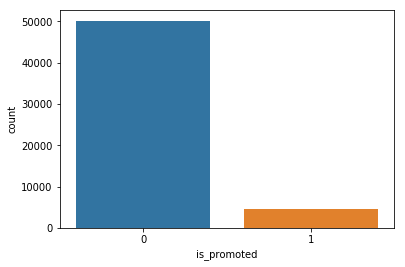

In [0]:
sns.countplot(data=data_train, x='is_promoted')

## Data processing

In [0]:
data_train['education'].replace(np.nan,"Other",inplace=True)

In [0]:
data_train['previous_year_rating'].replace(np.nan,data_train['previous_year_rating'].mean(),inplace=True)

In [0]:
data_train.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [0]:
data_train['sum_metric'] = data_train['KPIs_met >80%'] + data_train['previous_year_rating']

In [0]:
data_train['tot_score'] = data_train['avg_training_score'] * data_train['no_of_trainings']

In [0]:
#data_train['age_group'] = data_train['age'] + data_train['length_of_service']

In [0]:
#data_train.drop(columns=['KPIs_met >80%', 'previous_year_rating', 'avg_training_score', 'no_of_trainings',  'employee_id'], inplace= True)

In [0]:
data_train.drop(columns=['employee_id'], inplace= True)

Visualization

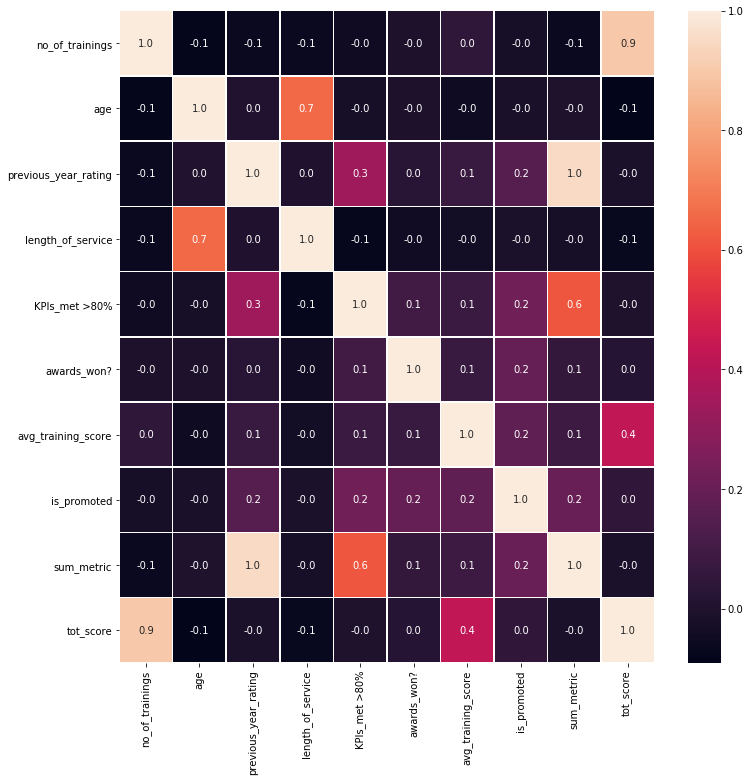

In [0]:
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(data_train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [0]:
#sns.boxplot(data_train['is_promoted'], data_train['age'])

In [0]:
#sns.boxplot(data_train['is_promoted'], data_train['length_of_service'])

## Encoding Categorical Values

In [0]:
data_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,tot_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,3.0,73


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [0]:
pd.get_dummies(columns=['department'], data=data_train)

,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,tot_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,region_7,Master's & above,f,sourcing,1,35,5.000000,8,1,0,...,49,0,0,0,0,0,0,0,1,0
1,region_22,Bachelor's,m,other,1,30,5.000000,4,0,0,...,60,0,0,0,0,1,0,0,0,0
2,region_19,Bachelor's,m,sourcing,1,34,3.000000,7,0,0,...,50,0,0,0,0,0,0,0,1,0
3,region_23,Bachelor's,m,other,2,39,1.000000,10,0,0,...,100,0,0,0,0,0,0,0,1,0
4,region_26,Bachelor's,m,other,1,45,3.000000,2,0,0,...,73,0,0,0,0,0,0,0,0,1
5,region_2,Bachelor's,m,sourcing,2,31,3.000000,7,0,0,...,170,1,0,0,0,0,0,0,0,0
6,region_20,Bachelor's,f,other,1,31,3.000000,5,0,0,...,59,0,0,0,0,1,0,0,0,0
7,region_34,Master's & above,m,sourcing,1,33,3.000000,6,0,0,...,63,0,0,0,0,1,0,0,0,0
8,region_20,Bachelor's,m,other,1,28,4.000000,5,0,0,...,83,1,0,0,0,0,0,0,0,0
9,region_1,Master's & above,m,sourcing,1,32,5.000000,5,1,0,...,54,0,0,0,0,0,0,0,1,0


In [0]:
data_train = pd.get_dummies(columns=['department'], data=data_train)
data_train = pd.get_dummies(columns=['region'], data=data_train)
data_train = pd.get_dummies(columns=['gender'], data=data_train)
data_train= pd.get_dummies(columns=['recruitment_channel'], data=data_train)

data_train['education'].replace("Master's & above",3,inplace=True)
data_train['education'].replace("Bachelor's",2,inplace=True)
data_train['education'].replace("Below Secondary",1,inplace=True)
data_train['education'].replace("Other",0,inplace=True)




In [0]:
data_train.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,3,1,35,5.0,8,1,0,49,0,6.0,...,0,0,1,0,0,1,0,0,0,1
1,2,1,30,5.0,4,0,0,60,0,5.0,...,0,0,0,0,0,0,1,1,0,0
2,2,1,34,3.0,7,0,0,50,0,3.0,...,0,0,0,0,0,0,1,0,0,1
3,2,2,39,1.0,10,0,0,50,0,1.0,...,0,0,0,0,0,0,1,1,0,0
4,2,1,45,3.0,2,0,0,73,0,3.0,...,0,0,0,0,0,0,1,1,0,0


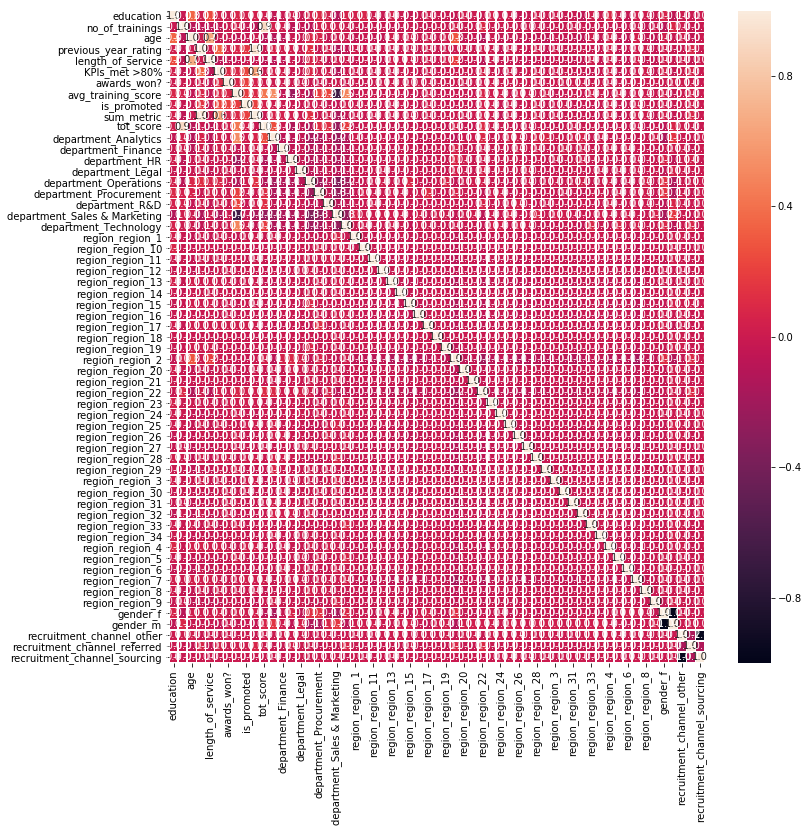

In [0]:
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(data_train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

In [0]:
# Original data
X = data_train.drop(columns='is_promoted')
y = data_train['is_promoted']

print ('X shape:', X.shape)
print ('y shape:', y.shape)

X shape: (54808, 58)
y shape: (54808,)


In [0]:
from sklearn.model_selection import train_test_split
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print("Number transactions training dataset: ", len(X_train))
print("Number transactions testing dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions training dataset:  38365
Number transactions testing dataset:  16443
Total number of transactions:  54808


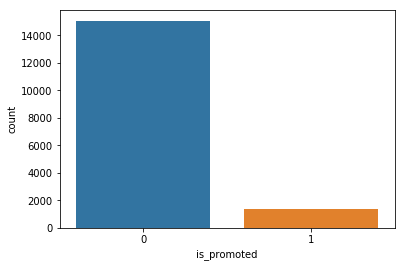

In [0]:
sns.countplot(x=y_test)

## Oversampling

In [0]:
data_train_2 = pd.concat([X_train, y_train], axis=1)
data_train_2['is_promoted'].value_counts()

0    35079
1     3286
Name: is_promoted, dtype: int64

Percentage of non promoted:  0.5
Percentage of promoted:  0.5
Total number of promoted in resampled data:  70158


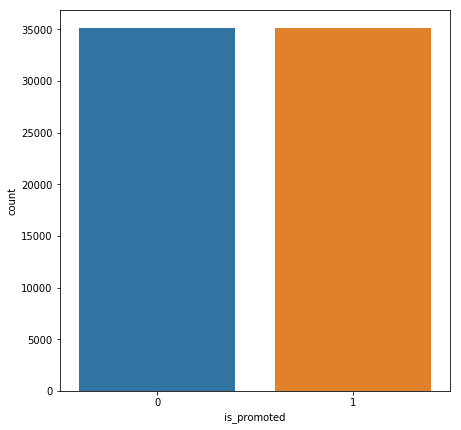

In [0]:
promoted_data = data_train_2[data_train_2['is_promoted'] == 1]
non_promoted_data = data_train_2[data_train_2['is_promoted'] == 0]


number_records_promoted = promoted_data.shape[0]
number_records_non_promoted = non_promoted_data.shape[0]


over_sample_promoted = promoted_data.sample(replace = True, n=number_records_non_promoted)
over_sample_data = pd.concat([over_sample_promoted, non_promoted_data], axis=0)


print("Percentage of non promoted: ", non_promoted_data.shape[0]/over_sample_data.shape[0])
print("Percentage of promoted: ", over_sample_promoted.shape[0]/over_sample_data.shape[0])
print("Total number of promoted in resampled data: ", over_sample_data.shape[0])

X_train_oversample = over_sample_data.drop(columns=['is_promoted'])
y_train_oversample = over_sample_data['is_promoted']

plt.figure(figsize=(7,7))

sns.countplot(data=over_sample_data, x='is_promoted')
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()
svm = LinearSVC()


models = [lr, dtc, rfc, gnb, bnb, svm]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB", "SVM"]

In [0]:
# Import confusion_matrix, classification_report
# Your code here
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score


def evaluate_model(estimator, X, y, description):
    # Note: We should test on the original test set
    prediction = estimator.predict(X)
    print('Confusion matrix:', confusion_matrix(y, prediction))
    print('Classification report:\n', classification_report(y, prediction))
    print('Testing set information:\n', "Your code here")

    # Set print options
    np.set_printoptions(precision=2)
    model_name = type(estimator).__name__
    return {'name': model_name, 
            'recall': recall_score(y, prediction),
            'precision': precision_score(y, prediction),
           'description': description}

In [0]:
X_train_oversample.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,tot_score,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
15052,2,1,29,3.329256,1,0,0,59,3.329256,59,...,0,0,0,0,0,0,1,0,0,1
32604,3,1,38,5.000000,5,1,1,97,6.000000,97,...,0,0,0,0,0,0,1,1,0,0
21970,2,1,29,5.000000,2,0,1,83,5.000000,83,...,0,0,0,0,0,0,1,0,0,1
49771,2,2,35,3.000000,9,1,1,98,4.000000,196,...,0,0,0,0,0,0,1,1,0,0
2509,2,2,55,5.000000,18,0,0,71,5.000000,142,...,0,0,0,0,0,0,1,1,0,0


In [0]:
scores_over = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train_oversample, y_train_oversample)
    scores_over.append(evaluate_model(model, X_test, y_test, 'oversample'))
    # Your code here
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix: [[11606  3455]
 [  249  1133]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86     15061
           1       0.25      0.82      0.38      1382

   micro avg       0.77      0.77      0.77     16443
   macro avg       0.61      0.80      0.62     16443
weighted avg       0.92      0.77      0.82     16443

Testing set information:
 Your code here
Model: Decision Tree
Confusion matrix: [[14179   882]
 [  766   616]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     15061
           1       0.41      0.45      0.43      1382

   micro avg       0.90      0.90      0.90     16443
   macro avg       0.68      0.69      0.69     16443
weighted avg       0.90      0.90      0.90     16443

Testing set information:
 Your code here
Model: Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix: [[14708   353]
 [  898   484]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     15061
           1       0.58      0.35      0.44      1382

   micro avg       0.92      0.92      0.92     16443
   macro avg       0.76      0.66      0.70     16443
weighted avg       0.91      0.92      0.92     16443

Testing set information:
 Your code here
Model: Bernoulli NB
Confusion matrix: [[6162 8899]
 [ 236 1146]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.41      0.57     15061
           1       0.11      0.83      0.20      1382

   micro avg       0.44      0.44      0.44     16443
   macro avg       0.54      0.62      0.39     16443
weighted avg       0.89      0.44      0.54     16443

Testing set information:
 Your code here
Model: Gaussian NB
Confusion matrix: [[10731  4330]
 [  391   991]]
Classification report:
           

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Making submission

In [0]:
data_test = pd.read_csv('./test_2umaH9m.csv')

In [0]:
print(data_test.shape)

(23490, 13)


### Data description test dataset 

In [0]:
data_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [0]:
data_test.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

In [0]:
employ_id = data_test[['employee_id']]

### Preprocessing testing data

In [0]:
data_test['education'].replace(np.nan,"Other",inplace=True)

In [0]:
data_test['previous_year_rating'].replace(np.nan,data_test['previous_year_rating'].mean(),inplace=True)

In [0]:
data_test.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
dtype: bool

In [0]:
data_test['sum_metric'] = data_test['KPIs_met >80%'] + data_test['previous_year_rating']

In [0]:
data_test['tot_score'] = data_test['avg_training_score'] * data_test['no_of_trainings']

In [0]:
#data_test['age_group'] = data_test['age'] + data_test['length_of_service']

In [0]:
#data_test.drop(columns=['KPIs_met >80%', 'previous_year_rating', 'avg_training_score', 'no_of_trainings',  'employee_id'], inplace= True)

In [0]:
data_test.drop(columns=['employee_id'], inplace= True)

In [0]:
data_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,tot_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,3.339146,1,1,0,77,4.339146,77
1,HR,region_4,Bachelor's,f,other,1,31,3.000000,5,0,0,51,3.000000,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.000000,4,0,0,47,1.000000,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.000000,9,0,0,65,2.000000,195
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.000000,7,0,0,61,4.000000,61


### Encoding test dataset

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
data_test = pd.get_dummies(columns=['department'], data=data_test)
data_test = pd.get_dummies(columns=['region'], data=data_test)
data_test = pd.get_dummies(columns=['gender'], data=data_test)
data_test= pd.get_dummies(columns=['recruitment_channel'], data=data_test)

data_test['education'].replace("Master's & above",3,inplace=True)
data_test['education'].replace("Bachelor's",2,inplace=True)
data_test['education'].replace("Below Secondary",1,inplace=True)
data_test['education'].replace("Other",0,inplace=True)




In [0]:
data_test.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,tot_score,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,24,3.339146,1,1,0,77,4.339146,77,...,0,0,0,0,0,0,1,0,0,1
1,2,1,31,3.000000,5,0,0,51,3.000000,51,...,0,0,0,0,0,1,0,1,0,0
2,2,1,31,1.000000,4,0,0,47,1.000000,47,...,0,0,0,0,0,0,1,1,0,0
3,2,3,31,2.000000,9,0,0,65,2.000000,195,...,0,0,0,0,0,1,0,1,0,0
4,2,1,30,4.000000,7,0,0,61,4.000000,61,...,0,0,0,0,0,0,1,0,0,1


In [0]:
data_test.isnull().any()

education                       False
no_of_trainings                 False
age                             False
previous_year_rating            False
length_of_service               False
KPIs_met >80%                   False
awards_won?                     False
avg_training_score              False
sum_metric                      False
tot_score                       False
department_Analytics            False
department_Finance              False
department_HR                   False
department_Legal                False
department_Operations           False
department_Procurement          False
department_R&D                  False
department_Sales & Marketing    False
department_Technology           False
region_region_1                 False
region_region_10                False
region_region_11                False
region_region_12                False
region_region_13                False
region_region_14                False
region_region_15                False
region_regio

## Predict test data 

In [0]:
predictions = rfc.predict(data_test)

In [0]:
data_test.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,tot_score,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,24,3.339146,1,1,0,77,4.339146,77,...,0,0,0,0,0,0,1,0,0,1
1,2,1,31,3.000000,5,0,0,51,3.000000,51,...,0,0,0,0,0,1,0,1,0,0
2,2,1,31,1.000000,4,0,0,47,1.000000,47,...,0,0,0,0,0,0,1,1,0,0
3,2,3,31,2.000000,9,0,0,65,2.000000,195,...,0,0,0,0,0,1,0,1,0,0
4,2,1,30,4.000000,7,0,0,61,4.000000,61,...,0,0,0,0,0,0,1,0,0,1


In [0]:
submission = employ_id

In [0]:
submission.head()

,employee_id
0,8724
1,74430
2,72255
3,38562
4,64486


In [0]:
submission['is_promoted'] = predictions

In [0]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [0]:
submission.to_csv('submission.csv', index=False)

In [0]:
from google.colab import files

In [0]:
files.download("submission.csv")